In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("height-weight.csv", delimiter=",")

In [3]:
X = df[["Weight"]]
y = df["Height"]

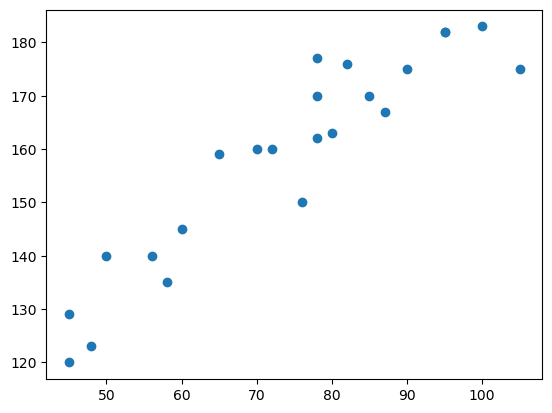

In [4]:
plt.scatter(X, y)

In [5]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs=-1)

regression.fit(X_train, y_train)


LinearRegression(n_jobs=-1)

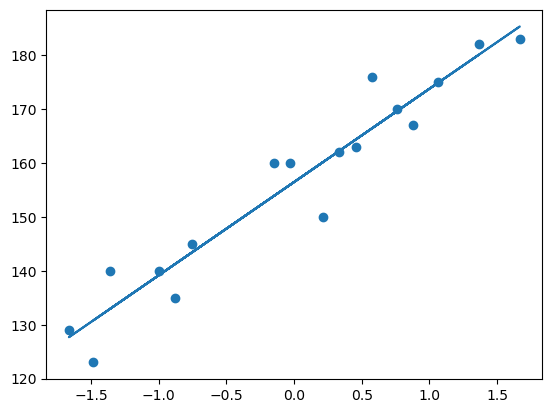

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [12]:
y_pred = regression.predict(X_test)

In [15]:
# Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse, mae, rmse)

114.84069295228699 9.66512588679501 10.716374991212605


In [16]:
# R2 & Adjusted R2
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

# Adjusted r2_score
adjusted_r2_score = 1 - (
    (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
)

print(score, adjusted_r2_score)

0.7360826717981276 0.6701033397476595


In [19]:
regression.predict(scaler.transform([[72]]))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])